## Predicting the Religion based on the features of the Country and their Country Flags 

### DataSource

The dataset for this study was extracted from the University of California Irvine’s Machine Learning Repository. The dataset was created by Richard S. Forsyth. Mr. Forsyth collected data for the flag dataset primarily from “Collins Gem Guide to Flags”: Collins Publishers (1986).

Link - https://archive.ics.uci.edu/ml/datasets/Flags

#### Attribute Information

- 1 => name: Name of the country concerned 
- 2 => landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania 
- 3 => zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
- 4 => area: in thousands of square km 
- 5 => population: in round millions 
- 6 => language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
- 7 => religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
- 8 => bars: Number of vertical bars in the flag 
- 9 => stripes: Number of horizontal stripes in the flag 
- 10 => colours: Number of different colours in the flag 
- 11 => red: 0 if red absent, 1 if red present in the flag 
- 12 => green: same for green 
- 13 => blue: same for blue 
- 14 => gold: same for gold (also yellow) 
- 15 => white: same for white 
- 16 => black: same for black 
- 17 => orange: same for orange (also brown) 
- 18 => mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
- 19 => circles: Number of circles in the flag 
- 20 => crosses: Number of (upright) crosses 
- 21 => saltires: Number of diagonal crosses 
- 22 => quarters: Number of quartered sections 
- 23 => sunstars: Number of sun or star symbols 
- 24 => crescent: 1 if a crescent moon symbol present, else 0 
- 25 => triangle: 1 if any triangles present, 0 otherwise 
- 26 => icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
- 27 => animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
- 28 => text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
- 29 => topleft: colour in the top-left corner (moving right to decide tie-breaks) 
- 30 => botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

#### Target Variable

'Religion' is the dependent variable and it can take below labels
- 0 = Catholic 
- 1 = Other Christian 
- 2 = Muslim 
- 3 = Buddhist 
- 4 = Hindu 
- 5 = Ethnic 
- 6 = Marxist 
- 7 = Others 

In [233]:
# Importing the necessary libraries for Data Analysing, Data Visualizing, Data Preppping & Model Building 

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, pairwise_distances

In [312]:
# Loading the Training dataset
train = pd.read_csv("flags_train.csv", names=["country", "landmass", "zone", "area", "population", "language", "religion", "vertical_bars", "horizontal_stripes", "total_colors", "red", "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles", "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle", "icon", "animate", "text", "top_left", "bottom_right"])

### Exploratory Data Analysis

- Performed univariate analysis
- performed multivariate analysis
- One hot encoding applied
- Removed useless features

In [235]:
# Exploring the structure of the dataset
train.head()

,country,landmass,zone,area,population,language,religion,vertical_bars,horizontal_stripes,total_colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,top_left,bottom_right
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [313]:
# Dropping 'Country' as it is not going to be helpful to our model
train_df = train.drop(['country'], axis=1)

In [237]:
# Shape of the dataset
train_df.shape

(194, 29)

In [238]:
# Checking the information of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 29 columns):
landmass              194 non-null int64
zone                  194 non-null int64
area                  194 non-null int64
population            194 non-null int64
language              194 non-null int64
religion              194 non-null int64
vertical_bars         194 non-null int64
horizontal_stripes    194 non-null int64
total_colors          194 non-null int64
red                   194 non-null int64
green                 194 non-null int64
blue                  194 non-null int64
gold                  194 non-null int64
white                 194 non-null int64
black                 194 non-null int64
orange                194 non-null int64
mainhue               194 non-null object
circles               194 non-null int64
crosses               194 non-null int64
saltires              194 non-null int64
quarters              194 non-null int64
sunstars              194 non-nul

In [239]:
# Running Descriptive Stats for Continous variables
train_df.describe()

,landmass,zone,area,population,language,religion,vertical_bars,horizontal_stripes,total_colors,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
# Running Descriptive Stats for Categorical variables
train_df.describe(include=['O'])

,mainhue,top_left,bottom_right
count,194,194,194
unique,8,7,8
top,red,red,red
freq,71,56,69


In [241]:
# Checking the Null values in dataset
train_df.isnull().sum()

landmass              0
zone                  0
area                  0
population            0
language              0
religion              0
vertical_bars         0
horizontal_stripes    0
total_colors          0
red                   0
green                 0
blue                  0
gold                  0
white                 0
black                 0
orange                0
mainhue               0
circles               0
crosses               0
saltires              0
quarters              0
sunstars              0
crescent              0
triangle              0
icon                  0
animate               0
text                  0
top_left              0
bottom_right          0
dtype: int64

### Note: Most of the visualizations are inspired from multiple sources like Kaggle, Udemy, Udacity etc

In [242]:
# Finding out the value counts for each Religion
train_df['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [243]:
# Finding out the percentage of value counts for each Religion
train_df['religion'].value_counts()/len(train_df)

1    0.309278
0    0.206186
2    0.185567
5    0.139175
6    0.077320
3    0.041237
7    0.020619
4    0.020619
Name: religion, dtype: float64

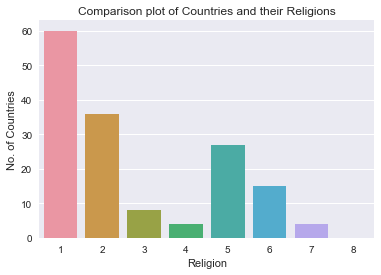

In [244]:
# Plotting against Countries and Religions
ax = sns.countplot(x='religion', order=[1,2,3,4,5,6,7,8], data=train_df)
ax.set_title('Comparison plot of Countries and their Religions')
ax.set_xlabel('Religion')
ax.set_ylabel('No. of Countries')

In [245]:
# Finding out the value counts for 'mainhue'
train_df['mainhue'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [246]:
# Finding out the percentage of value counts in 'mainhue'
train_df['mainhue'].value_counts()/len(train_df)

red       0.365979
blue      0.206186
green     0.159794
white     0.113402
gold      0.097938
black     0.025773
orange    0.020619
brown     0.010309
Name: mainhue, dtype: float64

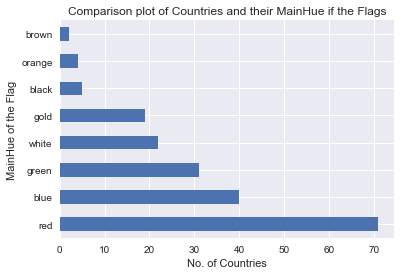

In [247]:
# Plotting against Countries and MainHue of the Flags
mseries = train_df['mainhue'].value_counts()
df = pd.DataFrame({'mainhue':mseries, 'count':mseries.values})

ax = df['count'].plot(kind='barh', title='Comparison plot of Countries and their MainHue if the Flags')

ax.set_ylabel('MainHue of the Flag')
ax.set_xlabel('No. of Countries')

In [248]:
# Finding out the value counts for 'top_left'
train_df['top_left'].value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: top_left, dtype: int64

In [249]:
# Finding out the percentage of value counts in 'top_left'
train_df['top_left'].value_counts()/len(train_df)

red       0.288660
blue      0.221649
white     0.211340
green     0.164948
black     0.061856
gold      0.030928
orange    0.020619
Name: top_left, dtype: float64

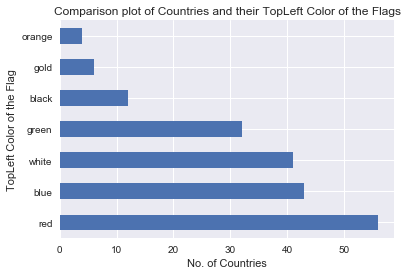

In [250]:
# Plotting against Countries and TopLeft Color of the Flags
tseries = train_df['top_left'].value_counts()
df2 = pd.DataFrame({'topleft':tseries, 'count':tseries.values})

ax = df2['count'].plot(kind='barh', title='Comparison plot of Countries and their TopLeft Color of the Flags')

ax.set_ylabel('TopLeft Color of the Flag')
ax.set_xlabel('No. of Countries')

In [251]:
# Finding out the value counts for 'bottom_right'
train_df['bottom_right'].value_counts()

red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: bottom_right, dtype: int64

In [252]:
# Finding out the percentage of value counts in 'bottom_right'
train_df['bottom_right'].value_counts()/len(train_df)

red       0.355670
blue      0.242268
green     0.206186
white     0.087629
black     0.046392
gold      0.046392
brown     0.010309
orange    0.005155
Name: bottom_right, dtype: float64

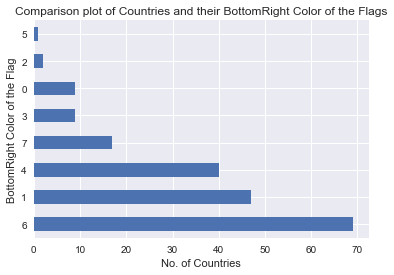

In [329]:
# Plotting against Countries and BottomRight Color of the Flags
bseries = train_df['bottom_right'].value_counts()
df2 = pd.DataFrame({'bottomright':bseries, 'count':bseries.values})

ax = df2['count'].plot(kind='barh', title='Comparison plot of Countries and their BottomRight Color of the Flags')

ax.set_ylabel('BottomRight Color of the Flag')
ax.set_xlabel('No. of Countries')

In [254]:
# Finding out the value counts for 'language'
train_df['language'].value_counts()

10    46
1     43
6     30
2     21
8     19
3     17
4      6
9      4
7      4
5      4
Name: language, dtype: int64

In [255]:
# Finding out the percentage of value counts in 'language'
train_df['language'].value_counts()/len(train_df)

10    0.237113
1     0.221649
6     0.154639
2     0.108247
8     0.097938
3     0.087629
4     0.030928
9     0.020619
7     0.020619
5     0.020619
Name: language, dtype: float64

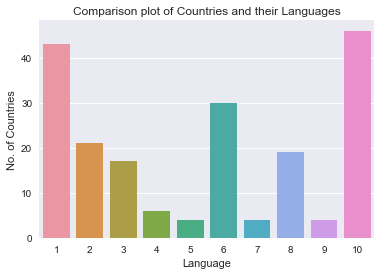

In [256]:
# Plotting against Countries and their Languages
ax = sns.countplot(x='language', order=[1,2,3,4,5,6,7,8,9,10], data=train_df)
ax.set_title('Comparison plot of Countries and their Languages')
ax.set_xlabel('Language')
ax.set_ylabel('No. of Countries')

In [257]:
# Taking the Cross Tabulation of Landmass and Religion
ct1 = pd.crosstab(train_df['landmass'], train_df['religion'], margins=True)
print(ct1)

religion   0   1   2  3  4   5   6  7  All
landmass                                  
1          9  21   0  0  0   0   1  0   31
2         13   3   0  0  1   0   0  0   17
3         14  13   0  0  0   0   8  0   35
4          2   7  15  0  1  26   0  1   52
5          0   0  20  8  2   0   6  3   39
6          2  16   1  0  0   1   0  0   20
All       40  60  36  8  4  27  15  4  194


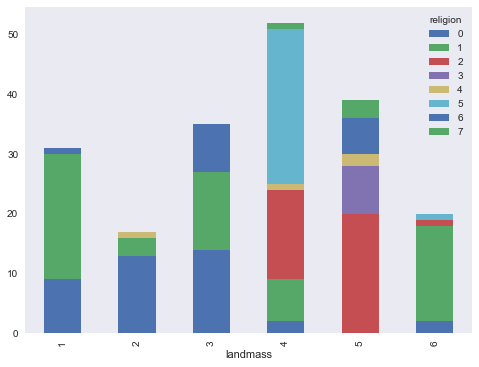

In [258]:
# Plotting against Landmass and Religion
ct1.iloc[:-1,:-1].plot(kind='bar', stacked=True, grid=False, figsize=(8,6))

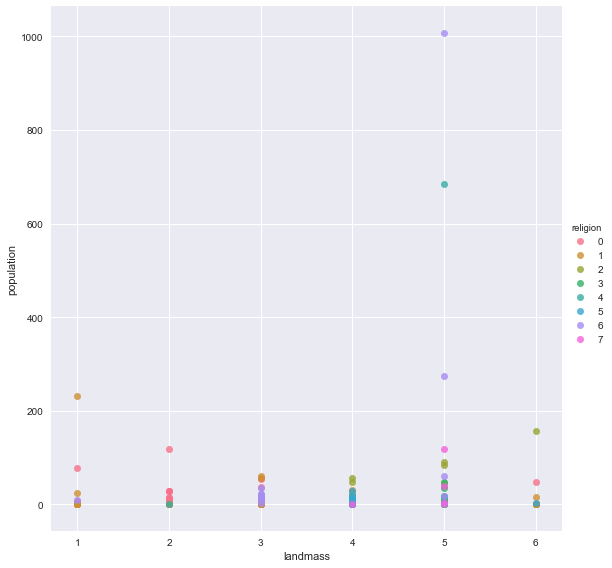

In [259]:
# Another plot to understand the religion spread across the landmass with the population
sns.lmplot(data=train_df, x='landmass', y='population', hue='religion', fit_reg=False, size=8)

In [260]:
# Taking the Cross Tabulation of Landmass and Religion
ct2 = pd.crosstab(train_df['zone'], train_df['religion'], margins=True)
print(ct1)

religion   0   1   2  3  4   5   6  7  All
landmass                                  
1          9  21   0  0  0   0   1  0   31
2         13   3   0  0  1   0   0  0   17
3         14  13   0  0  0   0   8  0   35
4          2   7  15  0  1  26   0  1   52
5          0   0  20  8  2   0   6  3   39
6          2  16   1  0  0   1   0  0   20
All       40  60  36  8  4  27  15  4  194


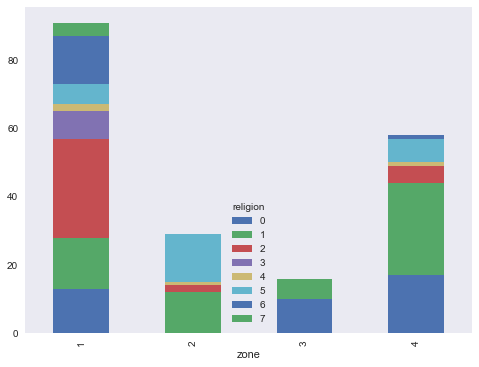

In [261]:
# Plotting against Landmass and Religion
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, grid=False, figsize=(8,6))

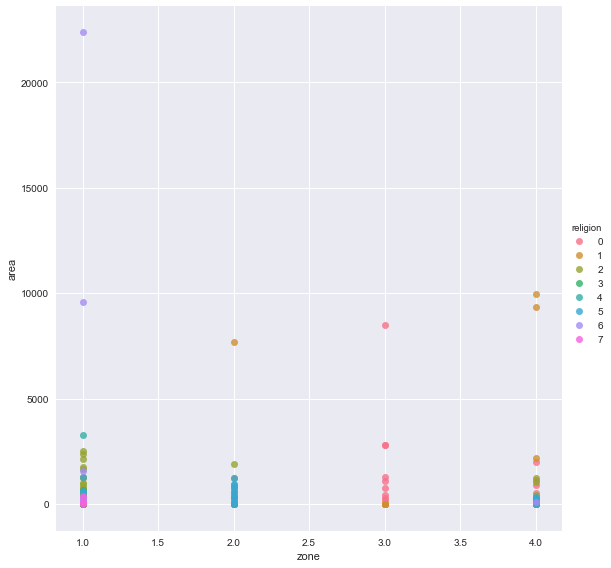

In [262]:
# Another plot to understand the religion spread across the zone with the area
sns.lmplot(data=train_df, x='zone', y='area', hue='religion', fit_reg=False, size=8)

### Outlier Detection

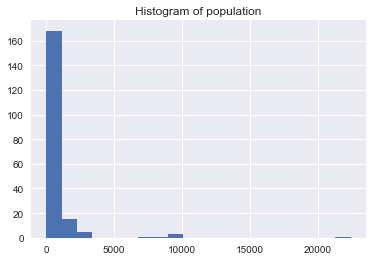

In [263]:
train_df.area.hist(bins=20).set_title("Histogram of Area")

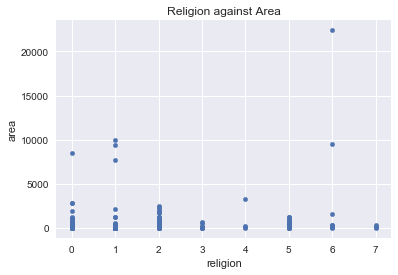

In [264]:
# Plotting Religion against Area
train_df.plot('religion', 'area', kind='scatter').set_title('Religion against Area')

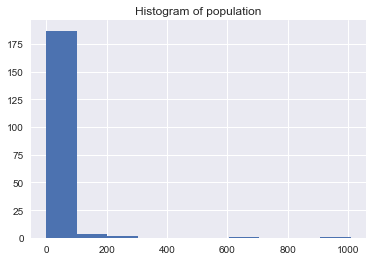

In [265]:
train_df.population.hist(bins=10).set_title("Histogram of population")

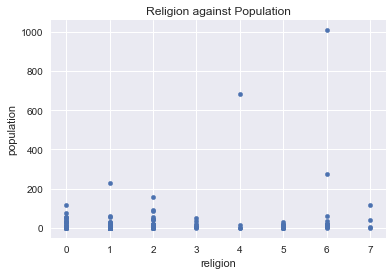

In [266]:
# Plotting Religion against Population
train_df.plot('religion', 'population', kind='scatter').set_title('Religion against Population')

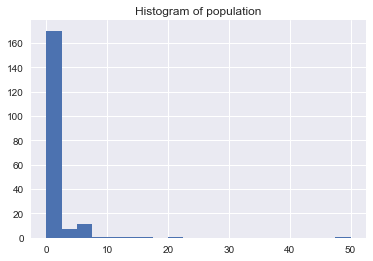

In [267]:
train_df.sunstars.hist(bins=20).set_title("Histogram of SunStars")

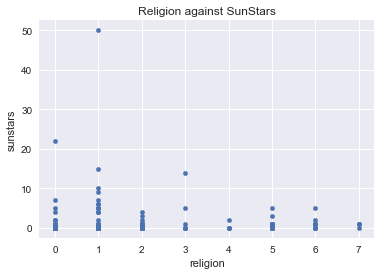

In [268]:
# Plotting Religion against SunStars
train_df.plot('religion', 'sunstars', kind='scatter').set_title('Religion against SunStars')

In [150]:
# Removing the outliers
# train_df = train_df[train_df.sunstars < 50]
# train_df = train_df[train_df.population < 1008]
# train_df = train_df[train_df.area < 22402]

### One Hot Encoding

In [314]:
# Creating a list for categorical variables 
cat_variables = ['mainhue', 'top_left', 'bottom_right']

In [315]:
# Converting Categorical variables into Numerical data
le = LabelEncoder()

for variable in cat_variables:
    train_df[variable] = le.fit_transform(train_df[variable])

In [27]:
# Applying One-hot encoding for the categorical variables
# for variable in cat_variables:
#     dummies = pd.get_dummies(train_df[variable], prefix=variable)
#     train_df = pd.concat([train_df, dummies], axis=1)
#     train_df.drop([variable], axis=1, inplace=True)

In [316]:
# Removing Dependent variable
y = train_df.pop('religion')

### Prepared a testing dataset myself, for the countries formed after 1990s

15 New Countries have become independent with the dissolution of USSR in 1991

- 1 = Armenia
- 2 = Azerbaijan
- 3 = Belarus
- 4 = Estonia
- 5 = Georgia
- 6 = Kazakhstan
- 7 = Kyrgyzstan
- 8 = Latvia
- 9 = Lithuania
- 10 = Moldova
- 11 = Russia
- 12 = Tajikistan
- 13 = Turkmenistan
- 14 = Ukraine
- 15 = Uzbekistan

Yugoslavia dissolved into 5 independent countries in the early 1990s

- 1 = Slovenia
- 2 = Croatia
- 3 = Bosnia
- 4 = Herzegovina
- 5 = Macedonia

14 other countries became independent through a variety of causes

- 1988, Palestine
- 1990, Namibia became independent of South Africa.
- 1990, North and South Yemen merged to form a unified Yemen.
- 1990, East Germany and West Germany merged to form a unified Germany after the fall of the Iron Curtain.
- 1991, The Marshall Islands was part of the Trust Territory of Pacific Islands (administered by the United States) and gained independence as a former colony.
- 1991, Micronesia, previously known as the Caroline Islands, became independent from the United States.
- 1993, The Czech Republic and Slovakia became independent nations when Czechoslovakia dissolved.
- 1993, Eritrea was a part of Ethiopia but seceded and gained independence.
- 1994, Palau was part of the Trust Territory of Pacific Islands (administered by the United States) and gained independence as a former colony.
- 2002, East Timor (Timor-Leste) declared independence from Portugal in 1975 but did not become independent from Indonesia until 2002.
- 2006, Montenegro was part of Serbia and Montenegro (also known as Yugoslavia) but gained independence after a referendum.
- 2006, Serbia became its own entity after Montenegro split.
- 2008, Kosovo unilaterally declared independence from Serbia.
- 2011, South Sudan peacefully seceded from Sudan following a January 2011 referendum. Sudan itself was the first to recognize South Sudan and did so one day early, on July 8, 2011.

In [317]:
# Loading the Testing dataset
test = pd.read_csv('flags_test.csv')

In [283]:
# Exploring the structure of the dataset
test.head()

,country,landmass,zone,area,population,language,vertical_bars,horizontal_stripes,total_colors,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,top_left,bottom_right
0,Armenia,6,1,29,3,10,0,3,3,1,...,0,0,0,0,0,0,0,0,red,orange
1,Azerbaijan,5,1,86,10,10,0,3,3,1,...,0,0,1,1,0,0,0,0,blue,green
2,Belarus,3,1,207,10,10,1,2,3,1,...,0,0,0,0,0,1,0,0,red,green
3,Estonia,3,1,45,1,10,0,3,3,0,...,0,0,0,0,0,0,0,0,blue,white
4,Kazakhstan,3,1,2724,17,10,1,0,2,0,...,0,0,1,0,0,0,1,0,gold,blue


In [318]:
# Dropping 'Country' to match the training dataset
test_df = test.drop(['country'], axis=1)

In [319]:
# Shape of the dataset
test_df.shape

(33, 28)

In [286]:
# Checking the information of the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 28 columns):
landmass              33 non-null int64
zone                  33 non-null int64
area                  33 non-null int64
population            33 non-null int64
language              33 non-null int64
vertical_bars         33 non-null int64
horizontal_stripes    33 non-null int64
total_colors          33 non-null int64
red                   33 non-null int64
green                 33 non-null int64
blue                  33 non-null int64
gold                  33 non-null int64
white                 33 non-null int64
black                 33 non-null int64
orange                33 non-null int64
mainhue               33 non-null object
circles               33 non-null int64
crosses               33 non-null int64
saltires              33 non-null int64
quarters              33 non-null int64
sunstars              33 non-null int64
crescent              33 non-null int64
triangle        

In [287]:
# Running Descriptive Stats for Continous variables
test_df.describe()

,landmass,zone,area,population,language,vertical_bars,horizontal_stripes,total_colors,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.0,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,3.909091,1.0,711.333333,11.515152,8.303030,0.242424,1.606061,3.090909,0.727273,0.333333,...,0.030303,0.030303,0.0,0.0,1.575758,0.090909,0.212121,0.242424,0.212121,0.0
std,1.182255,0.0,2977.169793,25.502599,3.292841,0.613917,1.560036,0.879049,0.452267,0.478714,...,0.174078,0.174078,0.0,0.0,3.102724,0.291937,0.415149,0.435194,0.415149,0.0
min,3.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,1.0,20.000000,2.000000,8.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.000000,1.0,52.000000,4.000000,10.000000,0.000000,2.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5.000000,1.0,143.000000,10.000000,10.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,6.000000,1.0,17075.000000,144.000000,10.000000,3.000000,5.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.0,12.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [288]:
# Running Descriptive Stats for Categorical variables
test_df.describe(include=['O'])

,mainhue,top_left,bottom_right
count,33,33,33
unique,6,6,7
top,blue,red,blue
freq,13,13,9


In [289]:
# Checking the Null values in dataset
test_df.isnull().sum()

landmass              0
zone                  0
area                  0
population            0
language              0
vertical_bars         0
horizontal_stripes    0
total_colors          0
red                   0
green                 0
blue                  0
gold                  0
white                 0
black                 0
orange                0
mainhue               0
circles               0
crosses               0
saltires              0
quarters              0
sunstars              0
crescent              0
triangle              0
icon                  0
animate               0
text                  0
top_left              0
bottom_right          0
dtype: int64

In [320]:
# Creating a list for categorical variables 
cat_variables = ['mainhue', 'top_left', 'bottom_right']

In [321]:
# Converting Categorical variables into Numerical data
le = LabelEncoder()

for variable in cat_variables:
    test_df[variable] = le.fit_transform(test_df[variable])

In [113]:
# Applying One-hot encoding for the categorical variables
# for variable in cat_variables:
#     dummies = pd.get_dummies(test_df[variable], prefix=variable)
#     test_df = pd.concat([test_df, dummies], axis=1)
#     test_df.drop([variable], axis=1, inplace=True)

In [322]:
# Creating train/test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=42)

### Multi-Class Classification 

- Generating predictions from different classifiers using default values 
- Bagging and Boosting algorithms are giving good results among the other Classifiers

In [293]:
# Instantiating multiple Classifiers
lr = LogisticRegression(penalty='l1')
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel='rbf')
gnb = GaussianNB()
gb = GradientBoostingClassifier(n_estimators=100)

In [294]:
classifiers = [lr, dt, rfc, svm, gnb, gb]

In [295]:
# Generating Accuracy Scores for the above Classifiers 
for model in classifiers:
    c = model.fit(X_train, y_train)
    a = accuracy_score(y_test, model.predict(X_test))
    print('accuracy for', model, 'is: ', a)

accuracy for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:  0.474576271186
accuracy for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') is:  0.559322033898
accuracy for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
 

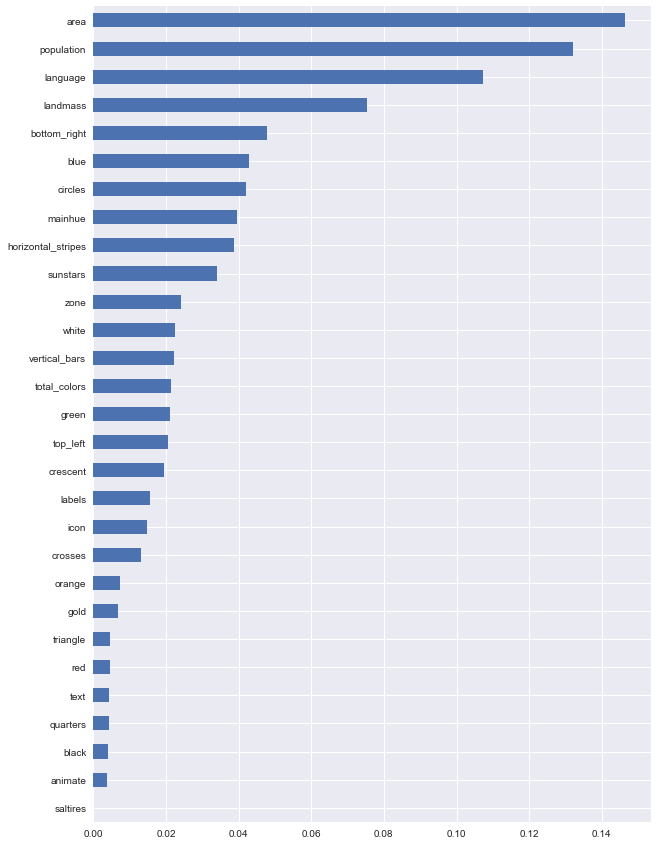

In [296]:
# Plotting Feature importances for GB Classifier
featureimportance = pd.Series(gb.feature_importances_, index=train_df.columns)
featureimportance.sort_values(inplace=True)
featureimportance.plot(kind='barh', figsize=(10,15))

### HyperParameter Tuning

- Gradient Boosting Classifier seems to be yielding better results. Hence, we will use the same for the final model
- Feature importance plot was generated to understand the importance of all features.

In [297]:
# Performing GridSearch to find the best hyperparameters for the RF Classifier
rfc_parameters = {'max_depth': [None,5],
                  'max_features': ['auto','sqrt'],
                  'n_estimators': [100,500],
                  'min_samples_split': [3,5],
                  'criterion': ['entropy','gini']
                  }
                  
rfc_search = GridSearchCV(estimator=rfc, 
                           param_grid=rfc_parameters,
                           scoring='accuracy',
                           n_jobs=-1)

# Training the model
rfc_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [None, 5], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 500], 'min_samples_split': [3, 5], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [298]:
# Best Score from the search
rfc_search.best_score_

0.6962962962962963

In [299]:
# Best Paramters from the search
rfc_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 500}

In [300]:
# Performing GridSearch to find the best hyperparameters for the GB Classifier
gb_parameters = {'max_depth': [2,9],
                 'learning_rate': [0.009, 0.05],
                  'n_estimators': [50,100],
                  'subsample': [0.3, 0.6]
                  }
                  
gb_search = GridSearchCV(estimator=gb, 
                           param_grid=gb_parameters,
                           scoring='accuracy',
                           n_jobs=-1)

# Training the model
gb_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 9], 'learning_rate': [0.009, 0.05], 'n_estimators': [50, 100], 'subsample': [0.3, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [301]:
# Best Score from the search
gb_search.best_score_

0.6518518518518519

In [302]:
# Best Paramters from the search
gb_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.6}

### Final Model

- Built the Final model using Gradient Boosting Classifier
- Generated Confusion Matrix
- Calulcated Average CV score
- Calculated Confidence Interval

In [324]:
# Building the final NB Classifier model 
gb = GradientBoostingClassifier(learning_rate=0.009,
                                n_estimators=100,
                                max_depth=9,
                                max_features='sqrt',
                                subsample=0.6,
                                random_state=10)
# Training the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.009, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.6, verbose=0, warm_start=False)

In [325]:
# Checking Accuracy Score for the test set
accuracy_score(y_test, gb.predict(X_test))

0.72881355932203384

In [305]:
# Checking Confusion Matrix for the test set
confusion_matrix(y_test, gb.predict(X_test))

array([[10,  1,  0,  0,  0,  0,  0],
       [ 0, 19,  1,  0,  0,  1,  1],
       [ 0,  0,  6,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  3,  0,  0,  6,  0],
       [ 2,  0,  2,  0,  0,  0,  1]])

### Cross Validation

In [326]:
# Performing K-Fold Cross Validation
scores = cross_val_score(gb, train_df, y, cv=10)
print('Average CV Score: ', np.mean(scores))

Average CV Score:  0.712591667448


In [307]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print("K-Fold CV Score is %f +/- %f" %(mean_score, ci))
print("95 percent probability that the average score would always be between %f and %f" %(lower_bound, upper_bound))

K-Fold CV Score is 0.700887 +/- 0.075758
95 percent probability that the average score would always be between 0.625129 and 0.776645


### Final Predictions

In [327]:
# Making predictions using the Final Model
predictions = gb.predict(test_df)

In [328]:
# Predicting the Religion for the Testing dataset
submission = pd.DataFrame({'Country': test['country'], 'Predicted_Religion': predictions})
submission.to_csv('flags_output.csv', index=False)